# CIFAR 10 - CLASSIFICATION USING CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[8]

array([[[134, 186, 223],
        [131, 184, 220],
        [128, 182, 218],
        ...,
        [127, 181, 222],
        [127, 181, 222],
        [128, 182, 223]],

       [[133, 189, 228],
        [129, 186, 224],
        [128, 186, 224],
        ...,
        [127, 183, 224],
        [127, 183, 224],
        [128, 184, 225]],

       [[128, 185, 226],
        [127, 182, 223],
        [128, 182, 223],
        ...,
        [126, 181, 222],
        [126, 181, 222],
        [126, 180, 221]],

       ...,

       [[174, 208, 235],
        [171, 206, 229],
        [155, 189, 216],
        ...,
        [ 27,  94, 136],
        [ 29,  96, 137],
        [ 28,  94, 136]],

       [[194, 221, 244],
        [189, 215, 239],
        [159, 196, 225],
        ...,
        [ 30,  95, 138],
        [ 30,  96, 139],
        [ 30,  95, 140]],

       [[193, 217, 237],
        [181, 208, 230],
        [168, 201, 227],
        ...,
        [ 31,  94, 136],
        [ 32,  94, 137],
        [ 32,  94, 138]]

In [6]:
def plot(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [7]:
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], shape=(50000,), dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

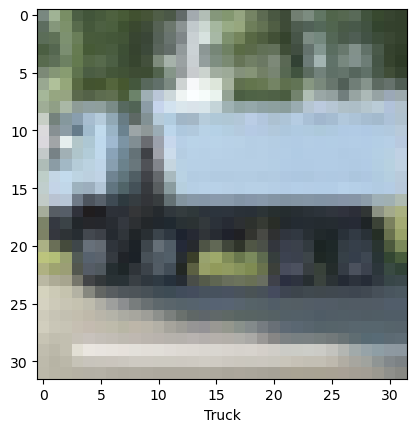

In [14]:
plot(X_train,y_train,369)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [24]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')])

C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
ANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
ANN.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - accuracy: 0.3299 - loss: 1.8888
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3956 - loss: 1.6824
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.4242 - loss: 1.6018


In [32]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')])

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
CNN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.9626 - loss: 0.1110
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.9681 - loss: 0.0936
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.9704 - loss: 0.0878
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.9744 - loss: 0.0758
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.9737 - loss: 0.0764


In [41]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6962 - loss: 1.8355


[1.8354859352111816, 0.6962000131607056]